In [1]:
# En primer lugar, se importan las librerías necesarias

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from IPython.display import display, Markdown
import numpy as np
import pandas as pd

Responded a las siguientes preguntas:
a. ¿Es ponderado?
b. ¿Es conexo?
c. ¿Es débilmente conexo?
d. ¿Cuál es su tamaño y su orden?
e. ¿Tiene algún punto de articulación? En caso positivo, indica cual.
f. ¿Tiene lazos?
g. ¿El grafo tiene algún ciclo? En caso positivo, indica cual.
h. ¿El grafo tiene algún ciclo? En caso positivo, indica cual
i. ¿Cuál es el mayor valor de k para el cual existe un k-core?
j. Obtened e imprimid por la salida el orden y el tamaño del grafo y averiguad si el grafo es dirigido o no. ¿Es un grafo denso o disperso?
k. Cread un grafo aleatorio G_AL que tenga el mismo orden y tamaño que el grafo que acabáis de cargar mediante la función gnm_random_graph(n,m).
l. Indica si ambos grafos son conexos.
m. Calcula número de componentes conexas de cada grafo.
n. ¿Cuál es el nodo con mayor grado en cada grafo?
o. ¿Cuál es el nodo con mayor betweeness?
p. ¿Cuál es el nodo con mayor closeness?
q. ¿Cuál es la máxima distancia entre dos nodos del grafo (diámetro del grafo)?
r. Visualizad la distribución del grado de los nodos de ambos grafos. ¿Son iguales las gráficas de distribución de grados de ambos grafos?, ¿Qué conclusión sacas de lo anterior? Dibuja ahora la distribución del grado de los nodos de la red de interacción de proteínas usando escala logarítmica en ambos ejes, añade para ello estas dos líneas de código para cambiar el tipo de escala en cada eje: plt.xscale("log", nonposx='clip'), plt.yscale("log", nonposy='clip').
s. ¿Qué tipo de gráfica obtienes? ¿Podrías calcular aproximadamente la pendiente de los datos?
t. 

In [21]:
G_rat = nx.read_edgelist("./TrabajoFinal/Rat_protein_interactions_(IntAct).txt")

G_hu = nx.read_edgelist("./TrabajoFinal/Human_BioGRID_protein_interactions.txt")

G_xd = nx.read_edgelist("./TrabajoFinal/Yeast_transcription_regulation_network.txt", delimiter = ">")

print(nx.info(G_xd))
print(nx.info(G_hu))
print(nx.info(G_rat))

Name: 
Type: Graph
Number of nodes: 3199
Number of edges: 8564
Average degree:   5.3542
Name: 
Type: Graph
Number of nodes: 17814
Number of edges: 139345
Average degree:  15.6444
Name: 
Type: Graph
Number of nodes: 1375
Number of edges: 1618
Average degree:   2.3535


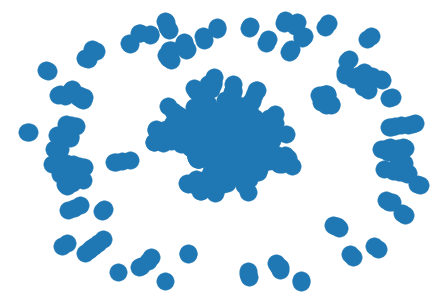

In [11]:
# G_diseasome = nx.read_adjlist("./data/bio-diseasome.mtx", comments = "%")

nx.draw(G_diseaosome)

In [6]:
# A continuación, se cargan los datos del fichero CaernoElegans-LC_uw.txt

G_diseasome = nx.read_adjlist("./data/bio-diseasome.mtx", comments = "%")

# Cálculos necesarios
n = nx.number_of_nodes(G_diseasome)
m = nx.number_of_edges(G_diseasome)
info = nx.info(G_diseasome)
directionality = nx.is_directed(G_diseasome)
dens = nx.density(G_diseasome)

# Respuestas
display(Markdown("""
<br>

Respecto al orden y el tamaño del grafo, estas métricas pueden calcularse a través de las funciones
``nx.number_of_nodes()`` y ``nx.number_of_edges()``, cuyos resultados son:

* Orden del grafo: {0}
* Tamaño del grafo: {1}

Sin embargo, estas métricas pueden ser calculadas directamente mediante ``nx.info()``, función que devuelve
también el grado medio del grafo:

<pre>{2}</pre>
<br>

En cuanto a la cardinalidad, se puede saber si el grafo es dirigido o no haciendo uso de la función
``nx.is_directed()``: si el resultado es True, es dirigido; si es False, no es dirigido. Así, ¿es dirigido el
grafo de estudio? 

    {3} (no es dirigido).

<br>

Respecto a si se trata de un grafo denso o disperso, podemos saberlo a través de la función ``nx.density()``, que 
devuelve el coeficiente de densidad a partir del cual podemos inferir si es denso o no:

* En el caso de que los valores sean cercanos a 1, se trata de un grafo denso.
* En el caso de que los valores se acerquen a 0, será disperso. 

También se puede establecer un punto de corte mediante la siguiente expresión:

* Un grafo es denso si $|E| > |V| · log(|V|)/2$.
* Un grafo es disperso si $|E| < |V| · log(|V|)/2$.

En este caso, podemos observar cómo el coeficiente de densidad es igual a {4}, por lo que se trata de un grafo
disperso.

<br>
                 """.format(n, m, info, directionality, round(dens, 7))))


<br>

Respecto al orden y el tamaño del grafo, estas métricas pueden calcularse a través de las funciones
``nx.number_of_nodes()`` y ``nx.number_of_edges()``, cuyos resultados son:

* Orden del grafo: 516
* Tamaño del grafo: 1188

Sin embargo, estas métricas pueden ser calculadas directamente mediante ``nx.info()``, función que devuelve
también el grado medio del grafo:

<pre>Name: 
Type: Graph
Number of nodes: 516
Number of edges: 1188
Average degree:   4.6047</pre>
<br>

En cuanto a la cardinalidad, se puede saber si el grafo es dirigido o no haciendo uso de la función
``nx.is_directed()``: si el resultado es True, es dirigido; si es False, no es dirigido. Así, ¿es dirigido el
grafo de estudio? 

    False (no es dirigido).

<br>

Respecto a si se trata de un grafo denso o disperso, podemos saberlo a través de la función ``nx.density()``, que 
devuelve el coeficiente de densidad a partir del cual podemos inferir si es denso o no:

* En el caso de que los valores sean cercanos a 1, se trata de un grafo denso.
* En el caso de que los valores se acerquen a 0, será disperso. 

También se puede establecer un punto de corte mediante la siguiente expresión:

* Un grafo es denso si $|E| > |V| · log(|V|)/2$.
* Un grafo es disperso si $|E| < |V| · log(|V|)/2$.

En este caso, podemos observar cómo el coeficiente de densidad es igual a 0.0089411, por lo que se trata de un grafo
disperso.

<br>
                 